# UNIVERSIDAD NACIONAL DE CÓRDOBA#
## Fa.M.A.F – Observatorio Astronómico ##
### Licenciatura en Astronomía ###
### Tapia Martina ###
### Astrometría 2020 ###
## Práctico N° 2##

## Actividad 2 ##
### lntroducción ###

Una variable aleatoria normal estándar es aquella que tiene una función de densidad de probabilidad:
$$ f_{X}(x) = (1/√2π) * e^{−x^{2}/2} $$

es decir, N(µ = 0, σ = 1). Existen varios métodos para generar esta variable en una computadora, que tienen distintas eficiencias, lo cual surge del hecho de que la cantidad de valores generados es menor que la cantidad de variables aleatorias uniformes que se usan. Uno de los métodos más eficientes es el método de Box-Muller. 
Este método permite obtener dos variables aleatorias normales estándar a partir de dos variables aleatorias uniformes, usando las transformaciones de Box-Muller.


El objetivo de este trabajo es: 
- Explicar el desarrollo teórico del método
- Desarrollar un programa para generar variables aleatorias normales utilizando el método de Box-Muller
- Mejorar la eficiencia del código generando pares de números aleatorios (X,Y) dentro del círculo de radio unidad

### Método de Box-Muller para generar una V.A. con distribución normal ###

Como se menconó anteriormente, el algoritmo Box-Muller se puede utilizar para convertir dos conjuntos de números aleatorios con distribuciones uniformes en dos conjuntos de números aleatorios con distribuciones gaussianas. Este algoritmo no utiliza ningún método de aproximación. En cambio, hace uso de la integral gaussiana.

Sean X e Y dos VA normales estándar independientes, y sean las nuevas variables definidas por:

$$ R^{2} = X^{2} + Y^{2} $$

$$ tan(θ) = X / Y $$

Como X e Y son independientes, la función de densidad de probabilidad conjunta f(X, Y) satisface que:
$$ f(X, Y) = f(X)*f(Y) $$

es decir, $$f(X, Y) = \frac {1} {\sqrt{ 2\pi }}e^{\frac{-x^2} {2}} \frac {1} {\sqrt{ 2\pi }}e^{\frac{-y^2} {2}}$$
$$ = \frac {1} {\sqrt{ 2\pi }}e^{\frac{-(x^2 + y^2)} {2}} $$
$$ = \frac {1} {\sqrt{ 2\pi }}e^{\frac{-R^2} {2}} $$

La función de densidad de probabilidad conjunta de $R^2$ y $ \theta $ está dada por el **teorema del cambio de variables**:

$$ f_{\overline {Y}} (\overline {y}) = \int_{-\infty}^{\infty} f_{\overline {X}} (\overline {x}) \prod_{i = 1}^m \delta(y_{i} -\varphi_{i}(\overline {x}))d\overline {x}$$

Sea el siguiente cambio de variables:

$$ \varphi_{1}(R^2, \theta) = x^2 + y^2 $$

$$ \varphi_{2}(R^2, \theta) = \arctan (\frac{y} {x}) $$


$$ f(R^2, \theta) = \int_{-\infty}^{\infty}\int_{-\infty}^{\infty} f(x,y) \delta(R^2 -\varphi_{1}(x,y))\delta(\theta -\varphi_{2}(x,y))dxdy$$


$$ f(R^2, \theta) = \frac{1} {2} \frac{1} {2\pi}e^{\frac{-R^2} {2}} $$

Notar que el factor 1/2 proviene de la inversa del Jacobiano de la transformación realizada, es decir el determinante de las derivadas parciales de R^2 y 0 con respecto a x e y. 
Luego, el resultado obtenido en la última ecuación, equivale al producto de una densidad exponencial con media 2 y una
uniforme entre 0 y 2π. Por lo tanto, R^2 y θ son independientes. De esta forma es posible sortear números θ y R^2 con esas
distribuciones, y hacer la transformación de variables para obtener variables X e Y que tendrán una distribución normal estándar cada una de ellas.

### Pasos a seguir para aplicar el método ###

-  Primero se generan dos números aleatorios u1 y u2. 
-  Luego, se define que:
$$ R^2 = -2 log(u1) $$

$$ \theta = 2\pi *  u2 $$

- Finalmente, se aplican las **transformaciones de Box-Muller**:
$$ x = R*cos(\theta) = \sqrt{ -2 log(u1) } * cos( 2\pi u2) $$


$$ y = R*sin(\theta) = \sqrt{ -2 log(u1) } * sin( 2\pi u2) $$

### Aplicación del método B-M ###

In [1]:
#Primero se importan las librerías necesarias para trabajar
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import seaborn as sns          
sns.set()         
from scipy.stats import poisson
import statistics

In [2]:
#Se define una función, que crea las variables aleatorias normales usando el método desarrollado

def Box_Muller1(n=1000):                    # n define la cantidad de variables que se desean 
    lx = []
    ly = []
    for i in range(n):
        u1 = random.random()
        u2 = random.random()
        x = math.sqrt(-2 * math.log(u1)) * math.cos(2*math.pi*u2)
        y = math.sqrt(-2 * math.log(u1)) * math.sin(2*math.pi*u2)
        lx.append(x)
        ly.append(y)
    return(lx,ly)

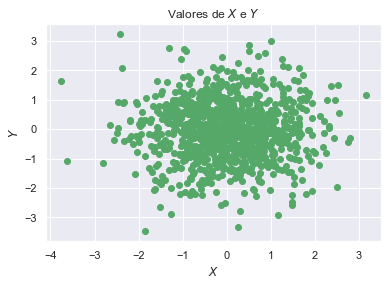

In [3]:
# Se grafican los resultados obtenidos 
x, y = Box_Muller1()
plt.title('Valores de $ X $ e $ Y $')
plt.plot(x, y, 'og')
plt.xlabel('$X$')
plt.ylabel('$Y$')
plt.show()

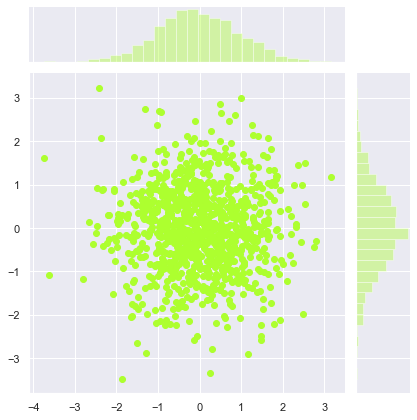

In [4]:
#Con el siguiente gráfico se puede ver las distribuciones de las variables X e Y

sns.jointplot(x, y, kind='scatter', color = 'greenyellow')

Lamentablemente, el uso de las transformaciones de Box-Muller para generar un par de variables aleatorias normales e independientes no es eficiente desde el punto de vista computacional, ya que calcular las funciones trigonométricas seno y coseno lleva tiempo. 

Sin embargo, hay una manera de evadir esta dificultad mediante un cálculo indirecto del seno y coseno de un ángulo aleatorio. Ésta forma consiste en generar pares de números aleatorios dentro de un círculo de radio unidad. A continuación se presenta ésta mejora, aplicándola al código de generación ya creado. 

In [5]:
#En primer lugar, se crea una función que generará las variables aleatorias de mejor manera

def Box_Muller2(n=1000):
    lx = []
    ly = []
    for i in range(n):
        u1 = random.random()        #Notar que si u es uniforme en (0,1), 2u e suniforme en (0,2) y 2u-1 es uniforme en (-1,1)
        u2 = random.random()               
        v1 = 2*u1 - 1               #v1 y v2 estan distribuidas uniformente en un cuadrado de área 4 con centro en (0,0)
        v2 = 2*u2 - 1
        s = v1**2 + v2**2           # s = R^2
        if s > 1:                   #Con este if se limita a los valores de v1 y v2 al círculo unidad
             None
        else:
            x = math.sqrt(-2 * math.log(s)/s) * v1
            y = math.sqrt(-2 * math.log(s)/s) * v2
            lx.append(x)
            ly.append(y)
    return(lx,ly)


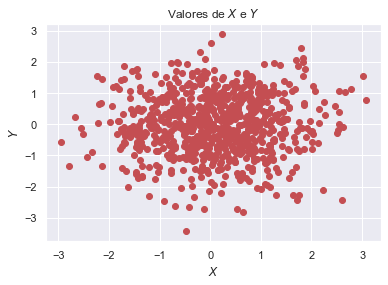

In [6]:
x, y = Box_Muller2()
plt.title('Valores de $ X $ e $ Y $')
plt.plot(x, y, 'or')
plt.xlabel('$X$')
plt.ylabel('$Y$')
plt.show()

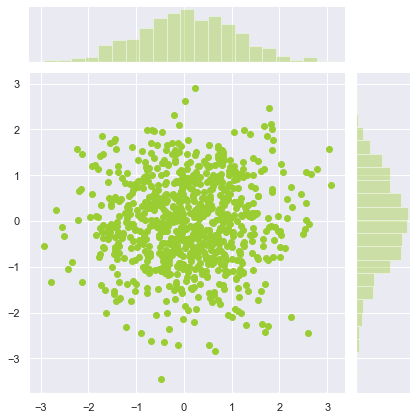

In [7]:
#Con el siguiente gráfico se puede ver las distribuciones de las variables X e Y

sns.jointplot(x, y, kind='scatter', color = 'yellowgreen')

Como se puede ver, las variables aleatorias obtenidas, con ambos métodos, están uniformemente distribuídas y sus distribuciones son similares. Es decir que a simple vista no se puede notar una 'diferencia' al variar el método. 
Se calculará a continuación el tiempo de cómputo de cada método para así evaluar su eficiencia. 

In [16]:
#Para el método 1 

Tiempo = %timeit -o Box_Muller1()


3.94 ms ± 204 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [17]:
#Se guardan los resultados en una lista
lT = Tiempo.all_runs
lT

[0.3849449999999024,
 0.37813870000002225,
 0.4015482999999449,
 0.3808963000000176,
 0.3757656999999881,
 0.396854400000052,
 0.4387358999999833]

In [18]:
#Se calcula un promedio de los 7 promedios de tiempos obtenidos en la celda anterior 
tm = statistics.mean(lT)
tm

0.3938406142857015

In [19]:
#Para Box_Muller2

Tiempo2 = %timeit -o Box_Muller2()

3.91 ms ± 101 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [20]:
lT2 = Tiempo2.all_runs
lT2

[0.37841419999995196,
 0.3845989000000145,
 0.38397520000000895,
 0.40576100000009774,
 0.382220899999993,
 0.40263849999996637,
 0.39683020000006763]

In [21]:
tm2 = statistics.mean(lT2)
tm2

0.39063412857144286

En primera instancia, los valores obtenidos son muy similares. Esto se debe a que la cantidad de variables pedidas, n, es aceptable y no se diferencian tanto los tiempos requeridos por cada método. A continuación se modificará n por 10000 y se verá que ocurre con los t.

In [35]:
Tiempo1 = %timeit -o Box_Muller1(n=1000000)


3.88 s ± 31.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [36]:
Tiempo2 = %timeit -o Box_Muller2(n=1000000)

3.84 s ± 27.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Con estos valores de n, se puede notar mayor diferencia entre los valores de tiempo encontrados. Es notable también que los errores de estos tiempos también son considerables y considerando el intervalo de validez en cada caso, ambos valores pertenecen al intervalo del otro método, y son indistinguibles. Finalmente, se puede decir que las diferencias son sútiles en estos casos, pero a la hora de aplicar estos métodos a programas más complicados y que requieren de mayor tiempo computacional, mejorar su eficacia puede ser muy beneficioso.  